In [4]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)


In [40]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

### Sea la distribucion que buscamos $Pareto(θ=2)$

In [42]:
θ:int = 2
muestra = random.pareto(a=θ, size=50)

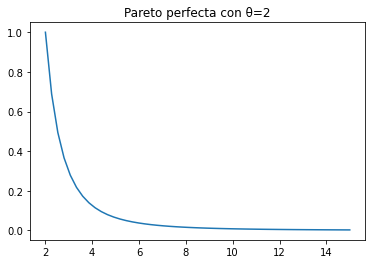

In [53]:
## vemos la distribucion perfecta
def I2(X:np.ndarray) -> np.ndarray:
    i2 = lambda x: (x >= 2 and 1) or 0 # identificadora
    vfunc = np.vectorize(i2)
    return vfunc(X)

X = np.linspace(2, 15)
Y = (θ*2**θ)/(X**(θ+1))*I2(X)

plt.title("Pareto perfecta con θ=2")
plt.plot(X,Y)
plt.show()

### Genero una muestra con la distribución dada ~ Teoria Generacion Numeros Aleatorios (teorica/clase_cambios_de_variable)

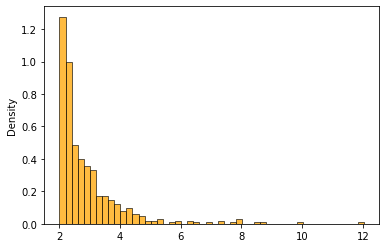

In [49]:
cuantas_veces = 500
U = stats.uniform.rvs(size=cuantas_veces)
X = (θ*2**θ / U)**(1/(θ+1))
hist = sns.histplot(data=X, stat='density', color='Orange', bins=50)

#### Nuestro estimador quedo $\theta_{MV}$ ...

$\theta_{MV} = 1 / -(ln(2) - ln(\prod_{i=1}^{n} X_i * I_{(2,+\inf)(X_i)}))$

In [64]:
def estimador_θMV(muestra:np.array) -> float:
    g:float = 0
    for x in muestra.flatten():
        if x != 0:
            g *= x 
    return 1 / (-np.log(2) - np.log(g))

In [65]:
estimador_θMV(muestra)

/tmp/ipykernel_429720/3976442944.py:6: RuntimeWarning: divide by zero encountered in log
  return 1 / (-np.log(2) - np.log(g))


0.0

#### Encontrar error!